## Find the projects with the samples to be part of the MSH-Tanzania dataset

In [1]:
import requests
import pandas as pd
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def get_project_data(project_id):
    API_URL = f"https://pad.crc.nd.edu/api/v2/projects/{project_id}/cards"
    try:
        # fetch_data_from_api
        r = requests.get(url=API_URL,verify=False)  # NOTE: Using verify=False due to a SSL issue, I need a valid certificate, then I will remove this parameter.
        r.raise_for_status() # Raise an exception if the status is not 200
        data = r.json()
        df = pd.json_normalize(data)
        return df
    except requests.exceptions.RequestException as e:
        print(e)
        print(f"Error accessing project data {project_id}: {r.status_code}")
        return None


In [20]:
project_id = 19
df = get_project_data(project_id)
df = df[df.deleted == False]

In [21]:
df.columns.to_list()

['id',
 'sample_name',
 'test_name',
 'user_name',
 'date_of_creation',
 'raw_file_location',
 'processed_file_location',
 'processing_date',
 'camera_type_1',
 'notes',
 'sample_id',
 'quantity',
 'deleted',
 'issue',
 'project.id',
 'project.user_name',
 'project.project_name',
 'project.annotation',
 'project.test_name',
 'project.sample_names.sample_names',
 'project.neutral_filler',
 'project.qpc20',
 'project.qpc50',
 'project.qpc80',
 'project.qpc100',
 'project.notes']

In [22]:
df[df.sample_id == 35865].sample_name

3131    Starch
Name: sample_name, dtype: object

In [23]:
df.sample_name.unique()

array(['Vitamin C', 'Paracetamol', 'Starch', 'Lactose', 'Cellulose',
       'Quinine ', 'Penicillin Procaine', 'Benzyl Penicillin',
       'Amoxicillin', 'Paracetamol Starch', 'Quinine', 'Unknown',
       'Acetaminophen Starch', ''], dtype=object)

`Acetaminophen Starch` ==  `Paracetamol Starch`

11079

802     10258
1595    
2705    12223
2707    12226

In [31]:
for url in  df[df.notes == "Training PAD Photos"].raw_file_location:
    print(url)


/var/www/html/joomla/images/padimages/raw/10000/11079_raw.jpg
/var/www/html/images/padimages/raw/10000/12223_raw.jpg
/var/www/html/images/padimages/raw/10000/12226_raw.jpg


In [32]:
df[df.notes == "Training PAD Photos"]

,id,sample_name,test_name,user_name,date_of_creation,raw_file_location,processed_file_location,processing_date,camera_type_1,notes,...,project.project_name,project.annotation,project.test_name,project.sample_names.sample_names,project.neutral_filler,project.qpc20,project.qpc50,project.qpc80,project.qpc100,project.notes
802,10258,Unknown,12LanePADKenya2015,Analyst 31,2018-11-29T19:33:47,,/var/www/html/images/padimages/processed/10000...,2018-11-29T19:33:47,unknown,Training PAD Photos,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
1595,11079,,12LanePADKenya2015,Analyst 24,2018-11-29T20:08:57,/var/www/html/joomla/images/padimages/raw/1000...,None,None,unknown,Training PAD Photos,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
2705,12223,Unknown,12LanePADKenya2015,analyst 21,2018-11-29T20:40:45,/var/www/html/images/padimages/raw/10000/12223...,/var/www/html/images/padimages/processed/10000...,2018-12-06T11:08:20,unknown,Training PAD Photos,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,
2707,12226,Unknown,12LanePADKenya2015,analyst 21,2018-11-29T20:40:46,/var/www/html/images/padimages/raw/10000/12226...,/var/www/html/images/padimages/processed/10000...,2018-12-04T15:55:28,unknown,Training PAD Photos,...,MSH Tanzania,None,12LanePADKenya2015,"[Amoxicillin, Benzyl Penicillin, Calcium Carbo...",,0,0,0,1,


In [15]:
for date in df.date_of_creation.unique():
    print(date)

2018-11-29T19:06:58
2018-11-29T19:07:03
2018-11-29T19:07:08
2018-11-29T19:07:14
2018-11-29T19:07:19
2018-11-29T19:07:24
2018-11-29T19:07:30
2018-11-29T19:07:35
2018-11-29T19:07:40
2018-11-29T19:07:46
2018-11-29T19:07:51
2018-11-29T19:07:56
2018-11-29T19:08:01
2018-11-29T19:08:06
2018-11-29T19:08:12
2018-11-29T19:08:17
2018-11-29T19:08:22
2018-11-29T19:08:27
2018-11-29T19:08:32
2018-11-29T19:08:37
2018-11-29T19:08:42
2018-11-29T19:08:48
2018-11-29T19:08:53
2018-11-29T19:08:58
2018-11-29T19:09:03
2018-11-29T19:09:08
2018-11-29T19:09:13
2018-11-29T19:09:19
2018-11-29T19:09:24
2018-11-29T19:09:29
2018-11-29T19:09:34
2018-11-29T19:09:39
2018-11-29T19:09:44
2018-11-29T19:09:49
2018-11-29T19:09:55
2018-11-29T19:09:59
2018-11-29T19:10:04
2018-11-29T19:10:09
2018-11-29T19:10:14
2018-11-29T19:10:19
2018-11-29T19:10:25
2018-11-29T19:10:30
2018-11-29T19:10:35
2018-11-29T19:10:40
2018-11-29T19:10:46
2018-11-29T19:10:51
2018-11-29T19:10:56
2018-11-29T19:11:01
2018-11-29T19:11:06
2018-11-29T19:11:11


In [4]:
## Counting unique values to identify categories in the 'sample_name' column

# Normalize case to lowercase and replace spaces with dashes in 'sample_name'
df['sample_name'] = df['sample_name'].str.lower().str.replace(' ', '-', regex=False)

# Counting unique values to identify categories
print(df['sample_name'].value_counts())

acetominophen                 499
ceftriaxone                   468
doxycycline                   432
ampicillin                    401
amoxicillin                   371
ciprofloxacin                 353
blank                         208
caco3-starch                  137
lactose                        83
swiped-but-not-run             78
ripe                           75
promethazine-hydrochloride     67
ethambutol                     67
rifampicin                     65
ferrous-sulfate                64
pyrazinamide                   63
albendazole                    61
chloroquine                    60
sulfamethoxazole               60
isoniazid                      60
azithromycin                   56
ampicillin-starch              53
doxycycline-starch             42
ciprofloxacin-starch           32
distractor                      6
                                5
Name: sample_name, dtype: int64


<Axes: xlabel='quantity', ylabel='Count'>

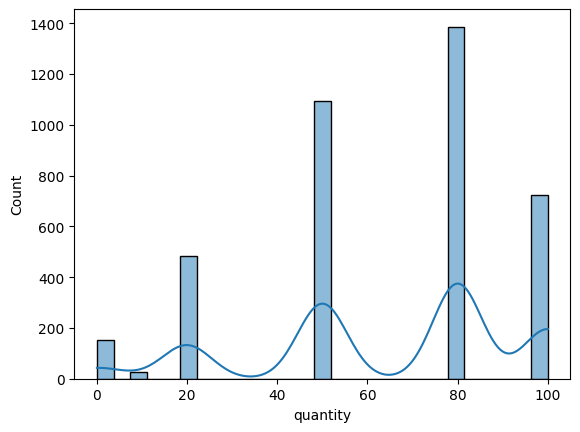

In [5]:
# Distribution visualization for 'quantity'
import seaborn as sns
sns.histplot(data=df, x='quantity', kde=True)

In [6]:
# List unique values for 'quantity'
unique_quantities = df['quantity'].unique()
print("Unique quantities:")
print(unique_quantities)



Unique quantities:
[ 80 100  50  20  10   0]


In [7]:
# Sample random 3 cases for each unique quantity
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity = df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 3)))

print("\nRandom sample cases for unique quantities:")
sample_cases_per_quantity[['id', 'sample_name']]


Random sample cases for unique quantities:


id                 sample_name
quantity                                        
0        3828  46153                       blank
         3804  46129                       blank
         3814  46139                       blank
10       1812  44108  promethazine-hydrochloride
         1806  44100  promethazine-hydrochloride
         1810  44104  promethazine-hydrochloride
20       2397  44718                       blank
         2424  44745          swiped-but-not-run
         530   42805                 doxycycline
50       2614  44935                 albendazole
         2158  44479                 doxycycline
         1134  43409                 ceftriaxone
80       1117  43392                 ceftriaxone
         233   42508                  ampicillin
         1287  43567               ciprofloxacin
100      2050  44371               acetominophen
         2795  45120               acetominophen
         1740  44023                        ripe

In [8]:
# Sample cases for unique quantities (e.g., first 3 entries for each quantity)
cols = ['quantity', 'id', 'id_sample', 'sample_name', 'camera_type_1', 'issue.id' ] 
sample_cases_per_quantity = df.groupby('quantity').apply(lambda x: x.head(3))

print("\nSample cases for unique quantities:")

sample_cases_per_quantity[['id', 'sample_name']]



Sample cases for unique quantities:


id                 sample_name
quantity                                        
0        3701  46026                       blank
         3702  46027                       blank
         3703  46028                       blank
10       1789  44079  promethazine-hydrochloride
         1790  44080  promethazine-hydrochloride
         1791  44081  promethazine-hydrochloride
20       428   42703                caco3-starch
         429   42704                caco3-starch
         430   42705                caco3-starch
50       151   42426           ampicillin-starch
         153   42428           ampicillin-starch
         158   42433           ampicillin-starch
80       0     42275                  ampicillin
         1     42276                  ampicillin
         2     42277                  ampicillin
100      28    42303                  ampicillin
         48    42323                  ampicillin
         51    42326                  ampicillin

## `swiped but not run`

In [9]:

# Define the specific sample_name you're interested in
specific_sample_name = 'swiped-but-not-run'

# Filter the DataFrame for the specific sample_name
specific_df = df[df['sample_name'].str.lower() == specific_sample_name.lower()]

# sample random 3 cases for each unique quantity within the specific sample_name
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity_specific = specific_df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 20)))

print(f"\nRandom sample cases for unique quantities within sample_name '{specific_sample_name}':")
#sample_cases_per_quantity_specific[['id', 'sample_id', 'sample_name', 'notes']]   


Random sample cases for unique quantities within sample_name 'swiped-but-not-run':


In [10]:
import ipyplot
import matplotlib.pyplot as plt



label_column = 'quantity'
data = sample_cases_per_quantity_specific
# Define the base URL
base_url = "https://pad.crc.nd.edu"

# Concatenate to get the full image URLs
data['url'] = base_url + data['processed_file_location']

# The 'url' column now contains the full URLs to the images
images = data['url'].values
labels = data[label_column].values

# Labels for the tabs - unique quantities
labels_list_filtered = data[label_column].unique().tolist()

# Show with tabs
ipyplot.plot_class_tabs(
    images, labels, tabs_order=labels_list_filtered, img_width=150
)

plt.show() 

In [11]:
# Count unique 'sample_id's and total 'id's for each 'sample_name' and 'quantity' group
counts_per_group = df[df['sample_name'].isin([specific_sample_name])].groupby(['sample_name', 'quantity']).agg({
    'sample_id': 'nunique',  # Counts unique sample_ids
    'id': 'count'            # Counts total ids
})

print("Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:")
counts_per_group

Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:


sample_id  id
sample_name        quantity               
swiped-but-not-run 20                8  23
                   50               20  54
                   80                1   1

## `blank`

In [12]:

# Define the specific sample_name you're interested in
specific_sample_name = 'blank'

# Filter the DataFrame for the specific sample_name
specific_df = df[df['sample_name'].str.lower() == specific_sample_name.lower()]

# sample random 3 cases for each unique quantity within the specific sample_name
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity_specific = specific_df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 20)))

print(f"\nRandom sample cases for unique quantities within sample_name '{specific_sample_name}':")
#sample_cases_per_quantity_specific[['id', 'sample_id', 'sample_name', 'notes']]   


Random sample cases for unique quantities within sample_name 'blank':


In [13]:
import ipyplot
import matplotlib.pyplot as plt



label_column = 'quantity'
data = sample_cases_per_quantity_specific
# Define the base URL
base_url = "https://pad.crc.nd.edu"

# Concatenate to get the full image URLs
data['url'] = base_url + data['processed_file_location']

# The 'url' column now contains the full URLs to the images
images = data['url'].values
labels = data[label_column].values

# Labels for the tabs - unique quantities
labels_list_filtered = data[label_column].unique().tolist()

# Show with tabs
ipyplot.plot_class_tabs(
    images, labels, tabs_order=labels_list_filtered, img_width=150
)

plt.show() 

In [14]:
# Count unique 'sample_id's and total 'id's for each 'sample_name' and 'quantity' group
counts_per_group = df[df['sample_name'].isin([specific_sample_name])].groupby(['sample_name', 'quantity']).agg({
    'sample_id': 'nunique',  # Counts unique sample_ids
    'id': 'count'            # Counts total ids
})

print("Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:")
counts_per_group

Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:


sample_id   id
sample_name quantity                
blank       0                28  152
            20                8   24
            50               10   30
            80                1    2

### Check if the 'processed_file_location' column has valid data

In [15]:
import ipyplot

# Check if the 'processed_file_location' column has valid data
if 'processed_file_location' in sample_cases_per_quantity_specific:
    # Concatenate to get the full image URLs
    sample_cases_per_quantity_specific['url'] = base_url + sample_cases_per_quantity_specific['processed_file_location']
    
    # Check if URLs are formed correctly
    for url in sample_cases_per_quantity_specific['url'].head():
        print(f"Checking URL: {url}")
        # Try to access the image
        response = requests.head(url, verify=False)
        if response.status_code == 200:
            print(f"URL is good: {url}")
        else:
            print(f"URL is bad: {url}, Status Code: {response.status_code}")
else:
    print("DataFrame doesn't contain 'processed_file_location' column.")

# # Assuming 'sample_cases_per_quantity_specific' is a DataFrame obtained from previous steps
# # and contains the 'url' column with the full URLs to the images.
# images = sample_cases_per_quantity_specific['url'].values
# labels = sample_cases_per_quantity_specific['quantity'].values

# # Labels for the tabs - unique quantities
# labels_list_filtered = sample_cases_per_quantity_specific['quantity'].unique().tolist()

# # Show with tabs
# ipyplot.plot_class_tabs(
#     images, labels, tabs_order=labels_list_filtered, max_imgs_per_tab=3, img_width=150
# )


Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46151_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46151_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46092_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46092_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46148_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46148_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46103_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46103_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46091_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/4